<a href="https://colab.research.google.com/github/dr-richard-barker/image-analysis-software-and-R-codes/blob/master/Plantcv_for_SPECTRUM_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plantcv
!pip install pillow


In [ ]:
# Import Libraries
from plantcv import plantcv as pcv
import matplotlib

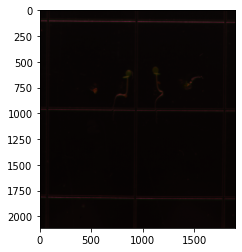

In [ ]:
#!wget "https://drive.google.com/file/d/1ZSs4IlOJFoLCUFo-1xwYdwsDsWoV5G0X/view?usp=sharing" -O original.tif
img = matplotlib.pyplot.imread("/content/crop_01436_2019_06_02__00_05_32_RGB.tif")
height, width, channels = img.shape

# Cut the image in half
height_cutoff = height // 2

t_img = img[:height_cutoff, :]
b_img = img[height_cutoff:, :]

#matplotlib.pyplot.imshow(t_img)
matplotlib.pyplot.imshow(b_img)

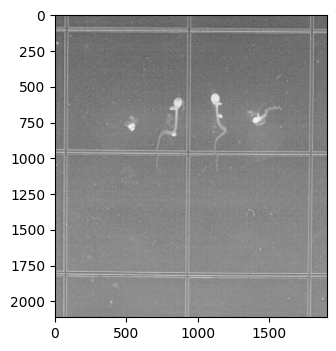

In [ ]:
pcv.params.debug = "plot"
bs_img = pcv.rgb2gray_hsv(rgb_img=b_img, channel='s')

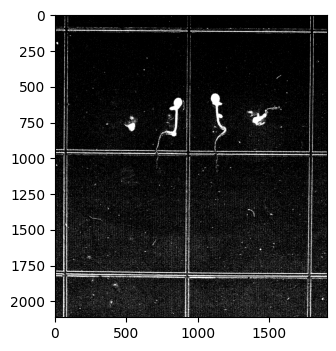

In [ ]:
bs_thresh = pcv.threshold.binary(gray_img=bs_img, threshold=160, max_value=255, object_type='light')

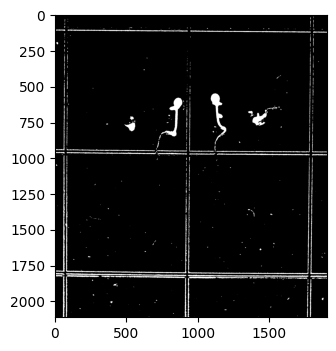

In [ ]:
bs_mblur = pcv.median_blur(gray_img=bs_thresh, ksize=5)

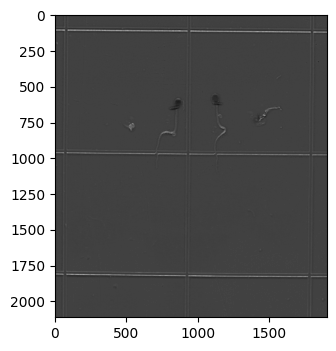

[[128 128 128 ... 128 130 130]
 [130 128 128 ... 128 130 128]
 [128 128 128 ... 130 130 130]
 ...
 [128 130 130 ... 128 130 130]
 [130 130 130 ... 128 130 130]
 [128 128 130 ... 130 128 128]]


In [ ]:
pcv.params.debug = "plot"
ba_img = pcv.rgb2gray_lab(rgb_img=b_img, channel='a')
print(ba_img)

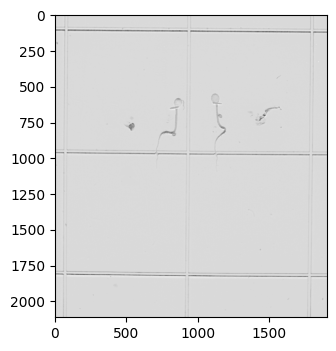

[[127 127 126 ... 126 126 126]
 [126 126 126 ... 127 126 126]
 [126 126 126 ... 126 126 126]
 ...
 [126 126 126 ... 126 126 126]
 [126 126 126 ... 126 126 126]
 [126 126 126 ... 126 126 126]]


In [ ]:
bb_img = pcv.rgb2gray_lab(rgb_img=b_img, channel='b')
print(bb_img)

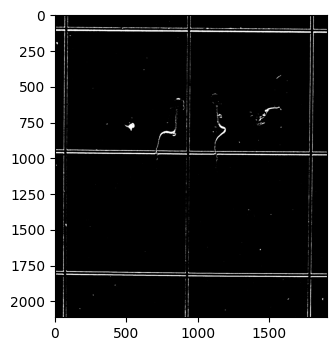

In [ ]:
#Show Roots
bar_thresh = pcv.threshold.binary(gray_img=ba_img, threshold=130, max_value=255,
                                    object_type='light')


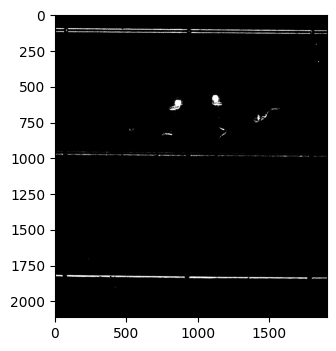

In [ ]:
#Show Shoots
bas_thresh = pcv.threshold.binary(gray_img=ba_img, threshold=125, max_value=255,
                                    object_type='dark')

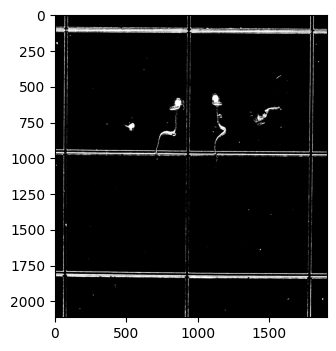

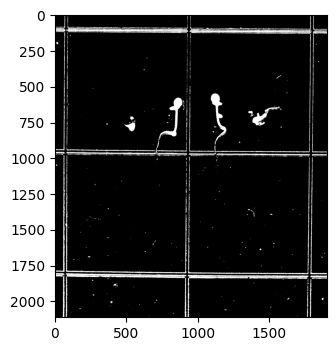

In [ ]:
    # Join the thresholded saturation and blue-yellow images

    # Inputs:
    #   bin_img1 - Binary image data to be compared to bin_img2
    #   bin_img2 - Binary image data to be compared to bin_img1
    bs = pcv.logical_or(bin_img1=bar_thresh, bin_img2=bas_thresh)
    b_com = pcv.logical_or(bin_img1=bs, bin_img2=bs_mblur)

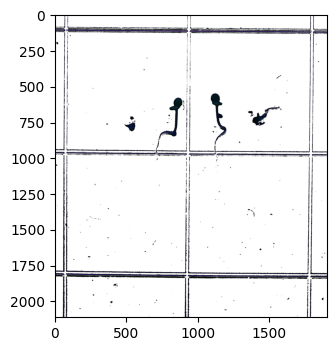

In [ ]:
    # Apply Mask (for VIS images, mask_color=white)

    # Inputs:
    #   rgb_img - RGB image data
    #   mask - Binary mask image data
    #   mask_color - 'white' or 'black'
    masked = pcv.apply_mask(img=b_img, mask=b_com, mask_color='white')

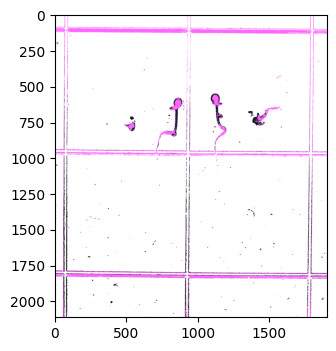

In [ ]:
  # Identify objects
id_objects, obj_hierarchy = pcv.find_objects(masked, bs)

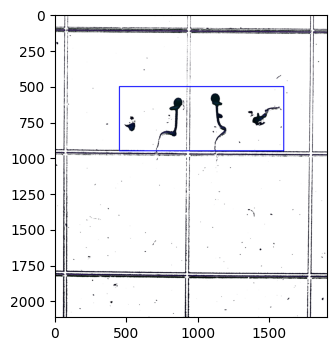

In [ ]:
# Define ROI

# Inputs:
#   img - RGB or grayscale image to plot the ROI on
#   x - The x-coordinate of the upper left corner of the rectangle
#   y - The y-coordinate of the upper left corner of the rectangle
#   h - The height of the rectangle
#   w - The width of the rectangle
roi1, roi_hierarchy= pcv.roi.rectangle(img=masked, x=450, y=500, h=450, w=1150)

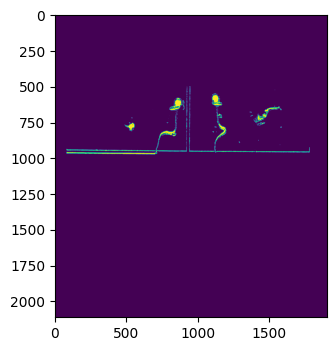

In [ ]:
# Decide which objects to keep
# Inputs:
#    img            = img to display kept objects
#    roi_contour    = contour of roi, output from any ROI function
#    roi_hierarchy  = contour of roi, output from any ROI function
#    object_contour = contours of objects, output from pcv.find_objects function
#    obj_hierarchy  = hierarchy of objects, output from pcv.find_objects function
#    roi_type       = 'partial' (default, for partially inside), 'cutto', or
#    'largest' (keep only largest contour)
roi_objects, hierarchy3, kept_mask, obj_area = pcv.roi_objects(img=b_img, roi_contour=roi1,
                                                                   roi_hierarchy=roi_hierarchy,
                                                                   object_contour=id_objects,
                                                                   obj_hierarchy=obj_hierarchy,
                                                                   roi_type='partial')
matplotlib.pyplot.imshow(kept_mask)

In [ ]:
obj, mask = pcv.object_composition(img=img, contours=roi_objects, hierarchy=hierarchy3)


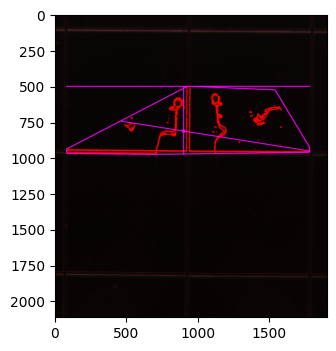

In [ ]:
############### Analysis ################
# Needs Work
# Find shape properties, data gets stored to an Outputs class automatically

# Inputs:
#   img - RGB or grayscale image data
#   obj- Single or grouped contour object
#   mask - Binary image mask to use as mask for moments analysis
analysis_image = pcv.analyze_object(img=b_img, obj=obj, mask=mask)
matplotlib.pyplot.imshow(analysis_image)